In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from operator import add
from matplotlib.ticker import (MultipleLocator, FixedLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
%matplotlib notebook
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": 'serif',
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        "axes.linewidth":1,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}
mpl.rcParams.update(nice_fonts)

<IPython.core.display.Javascript object>


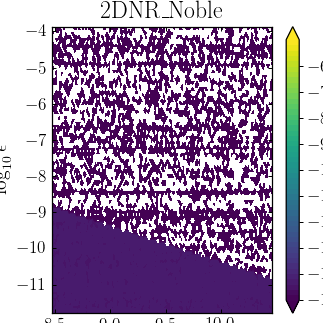

Text(10.485302714105957, 0.5, '$\\log_{10} \\epsilon$')

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (4,4))
plt.tight_layout()
ax.tick_params(which = 'both', direction = 'in', bottom = True, top = True, left = True, right = True, labelleft = True)
#ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#ax.set_ylim( 1, 3)
#ax.set_xlim( 0, 0.022)
#ax.set_yscale('log')
ax.set_title( "2DNR\_Noble")
ax.set_xlabel(r"$\log_{10} \rho$")
ax.set_ylabel(r"$\log_{10} \epsilon$")


In [26]:
test_files = [ '2DNRNoble.h5']
vmin = -15
vmax = -5
for test_file in test_files:
    test = h5py.File( test_file)
    N_RHO = test[ "N_RHO"][0]
    N_TEMP = test[ "N_TEMP"][0]
    prims_or = test[ "prims_or"][()]
    prims_sol = test[ "prims_sol"][()]
    rel_diff = 2.0 * abs( prims_or - prims_sol) / abs( prims_or + prims_sol)
    rel_diff = np.log10( np.sum( rel_diff, axis=1))
    rel_diff = np.reshape( rel_diff, (N_RHO,N_TEMP))
    contourf_ = ax.contourf( np.log10( prims_or[:N_TEMP,4]), np.log10( prims_or[::N_TEMP,0]), rel_diff, levels=np.linspace(vmin,vmax), extend='both')
    test.close()
cbar = fig.colorbar(contourf_,ticks=range(vmin,vmax))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [27]:
fig.savefig( "testResults.pdf", bbox_inches="tight" )